In [1]:
import pandas as pd
import numpy as np
from numpy import unique
from numpy import where
import re
import matplotlib.pyplot as plt
import random
import seaborn as sns

# Scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import SpectralClustering
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift

#datacleaning
#removed all lettters
#summed values of different camera size
#some phones had bonus of 3D camera, this was made equal to +5 to final value

In [2]:
df=pd.read_csv("Mobile phone price clean.csv")
df = df.set_index('PhoneID')
df = df.drop('Unnamed: 9', axis=1)

In [3]:
df.head()

,Brand,Model,Storage,RAM,Screen Size,Camera,Battery Capacity,Price
PhoneID,,,,,,,,
1,Apple,iPhone 13 Pro,128,6,6.10,36.0,3095.0,999.0
2,Samsung,Galaxy S21 Ultra,256,12,6.80,140.0,5000.0,1199.0
3,OnePlus,9 Pro,128,8,6.70,108.0,4500.0,899.0
4,Xiaomi,Redmi Note 10 Pro,128,6,6.67,79.0,5020.0,279.0
5,Google,Pixel 6,128,8,6.40,62.2,4614.0,799.0


In [4]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

scaler = MinMaxScaler()

#columns to scale
cols_to_scale = ['Storage', 'RAM', 'Screen Size', 'Camera', 'Battery Capacity']

data = df[cols_to_scale].values
scaler = MinMaxScaler(feature_range=(1, 10))
scaled_data = scaler.fit_transform(data)
df[cols_to_scale] = scaled_data

print(df)

           Brand              Model  Storage       RAM  Screen Size    Camera  \
PhoneID                                                                         
1          Apple      iPhone 13 Pro      2.8  3.571429     3.322581  2.527273   
2        Samsung   Galaxy S21 Ultra      5.2  7.428571     4.338710  8.200000   
3        OnePlus              9 Pro      2.8  4.857143     4.193548  6.454545   
4         Xiaomi  Redmi Note 10 Pro      2.8  3.571429     4.150000  4.872727   
5         Google            Pixel 6      2.8  4.857143     3.758065  3.956364   
...          ...                ...      ...       ...          ...       ...   
403      Samsung   Galaxy Note20 5G      2.8  4.857143     4.193548  5.363636   
404       Xiaomi      Mi 10 Lite 5G      2.8  3.571429     4.004839  3.836364   
405        Apple  iPhone 12 Pro Max      2.8  3.571429     4.193548  2.527273   
406         Oppo              Reno3      2.8  4.857143     3.758065  4.436364   
407      Samsung    Galaxy S

In [5]:
#rank features

rankings = {}

for col in df.columns[2:7]:
    rank = int(input(f"On a rank of 1 to 5, 1 being the most valuable. how valuable is feature {col}? "))
    rankings[col] = rank

#price constraint
budget = float(input("What is your price budget? $ "))

# remove any rows with a price higher than the budget, this could make matrix regression is done on super small
#df = df[df['Price'] <= budget]
# print the rankings dictionary
print(rankings)


On a rank of 1 to 5, 1 being the most valuable. how valuable is feature Storage? 1
On a rank of 1 to 5, 1 being the most valuable. how valuable is feature RAM? 2
On a rank of 1 to 5, 1 being the most valuable. how valuable is feature Screen Size? 3
On a rank of 1 to 5, 1 being the most valuable. how valuable is feature Camera? 4
On a rank of 1 to 5, 1 being the most valuable. how valuable is feature Battery Capacity? 5
What is your price budget? $ 500
{'Storage': 1, 'RAM': 2, 'Screen Size': 3, 'Camera': 4, 'Battery Capacity': 5}


In [6]:
# multiply the value of each feature column by 0.3 if it was ranked 1
for col, rank in rankings.items():
    if rank == 1:
        df[col] = df[col] * 0.3
    if rank == 2:
        df[col] = df[col] * 0.25
    if rank == 3:
        df[col] = df[col] * 0.2
    if rank == 4:
        df[col] = df[col] * 0.15
    if rank == 5:
        df[col] = df[col] * 0.1
# print the modified dataframe
print(df)

           Brand              Model  Storage       RAM  Screen Size    Camera  \
PhoneID                                                                         
1          Apple      iPhone 13 Pro     0.84  0.892857     0.664516  0.379091   
2        Samsung   Galaxy S21 Ultra     1.56  1.857143     0.867742  1.230000   
3        OnePlus              9 Pro     0.84  1.214286     0.838710  0.968182   
4         Xiaomi  Redmi Note 10 Pro     0.84  0.892857     0.830000  0.730909   
5         Google            Pixel 6     0.84  1.214286     0.751613  0.593455   
...          ...                ...      ...       ...          ...       ...   
403      Samsung   Galaxy Note20 5G     0.84  1.214286     0.838710  0.804545   
404       Xiaomi      Mi 10 Lite 5G     0.84  0.892857     0.800968  0.575455   
405        Apple  iPhone 12 Pro Max     0.84  0.892857     0.838710  0.379091   
406         Oppo              Reno3     0.84  1.214286     0.751613  0.665455   
407      Samsung    Galaxy S

In [7]:
df['score']=df['Storage']+df['RAM']+df['Screen Size']+df['Camera']+df['Battery Capacity']
print(df)

           Brand              Model  Storage       RAM  Screen Size    Camera  \
PhoneID                                                                         
1          Apple      iPhone 13 Pro     0.84  0.892857     0.664516  0.379091   
2        Samsung   Galaxy S21 Ultra     1.56  1.857143     0.867742  1.230000   
3        OnePlus              9 Pro     0.84  1.214286     0.838710  0.968182   
4         Xiaomi  Redmi Note 10 Pro     0.84  0.892857     0.830000  0.730909   
5         Google            Pixel 6     0.84  1.214286     0.751613  0.593455   
...          ...                ...      ...       ...          ...       ...   
403      Samsung   Galaxy Note20 5G     0.84  1.214286     0.838710  0.804545   
404       Xiaomi      Mi 10 Lite 5G     0.84  0.892857     0.800968  0.575455   
405        Apple  iPhone 12 Pro Max     0.84  0.892857     0.838710  0.379091   
406         Oppo              Reno3     0.84  1.214286     0.751613  0.665455   
407      Samsung    Galaxy S

In [8]:
data_mat = df.values
data_mat.shape

(407, 9)

In [9]:
#Split data to training and testing
X = data_mat[:,2:7]
y = data_mat[:,7]
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.3, random_state=100)

<AxesSubplot:>

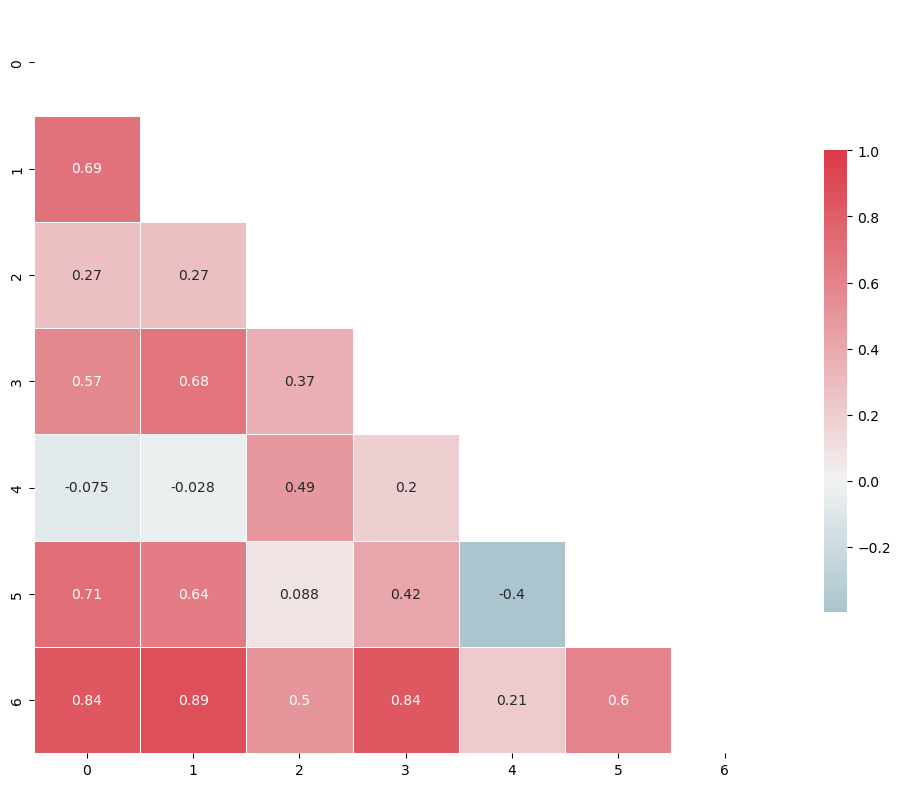

In [10]:
#Observation of covariance and correlation between different features (columns, explanatory variables)
df2=df.loc[:,df.dtypes != object]
corr =df2.corr()
corr=corr.values

mask = np.zeros_like(corr, dtype= bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0,annot=True, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [11]:
#Utilize PCA to describe low-dimension representations.
pca_i = PCA(n_components=4)
pc_i = pca_i.fit_transform(X)


print("PCA components: %s")
print(pca_i.components_)
print("Explained Variance %")
print(pca_i.explained_variance_)
print ("Explained Variance Ratio")
print (pca_i.explained_variance_ratio_)

PCA components: %s
[[ 0.61451664  0.69183747  0.06994129  0.37260857 -0.00112913]
 [ 0.77070906 -0.48032749 -0.07044317 -0.36658358 -0.18959767]
 [-0.1406411   0.49821135 -0.28869132 -0.64039063 -0.48842879]
 [ 0.06336789  0.20333536  0.43989143 -0.56259929  0.66679593]]
Explained Variance %
[0.27792035 0.04684437 0.03304308 0.01757796]
Explained Variance Ratio
[0.72786792 0.12268447 0.08653918 0.04603634]


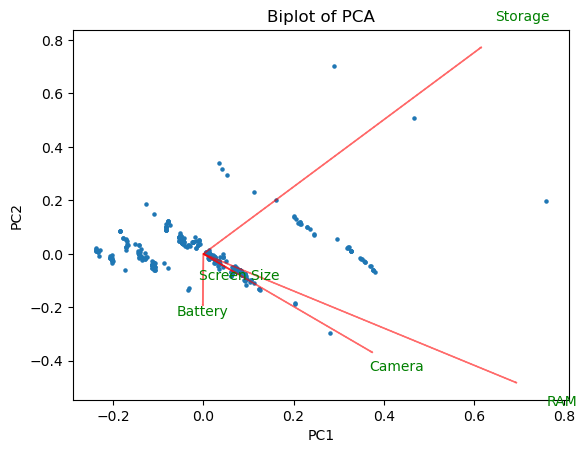

<Figure size 640x480 with 0 Axes>

In [12]:
def biplot(score,coef,labels=None):
 
    xs = score[:,0]
    ys = score[:,1]
    n = coef.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s=5)
 
    for i in range(n):
        plt.arrow(0, 0, coef[i,0],coef[i,1],color = 'r',alpha = 0.5)
        plt.text(coef[i,0]* 1.15,coef[i,1] * 1.15,labels[i],color = 'g',ha = 'center',va = 'center')
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))    
 
 
    plt.figure()


scaler = StandardScaler()
  
scaler.fit(X)
 
pca = PCA(n_components=4)
PC = pca.fit_transform(X)

plt.title('Biplot of PCA')
 
biplot(PC,np.transpose(pca.components_), list(['Storage','RAM','Screen Size','Camera','Battery','Score']))

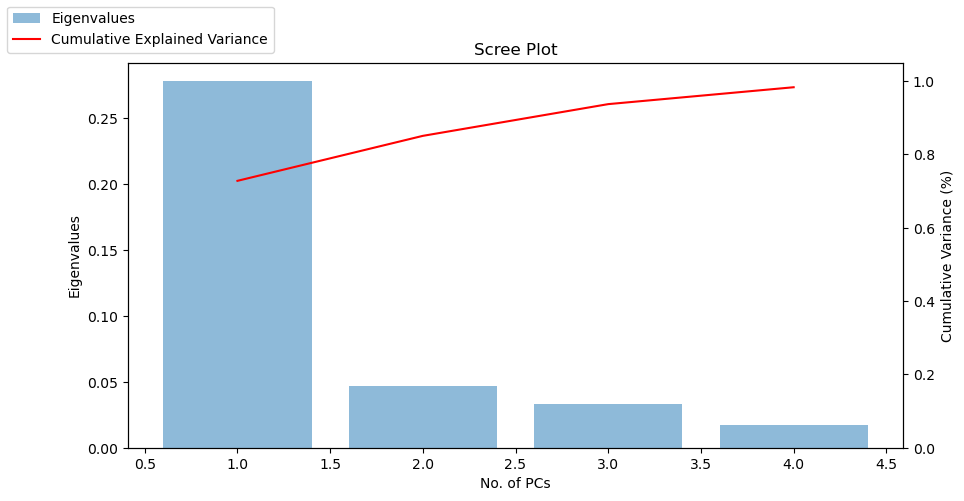

In [13]:
#Use plots such as Scree-plot, Bi-plot etc

fig,ax1=plt.subplots(figsize=(10,5))
ax2=ax1.twinx()
ax1.bar(range(1,len(pca_i.explained_variance_)+1),pca_i.explained_variance_,alpha=0.5,label="Eigenvalues")
ax1.set_ylabel('Eigenvalues')
ax1.set_xlabel('No. of PCs')
ax2.plot(range(1,len(pca_i.explained_variance_ )+1),np.cumsum(pca_i.explained_variance_ratio_),c='red',label="Cumulative Explained Variance")
ax2.set_ylabel("Cumulative Variance (%)")
ax2.set_ylim([0,1.05])
fig.legend(loc='upper left')
plt.title('Scree Plot')
plt.show()



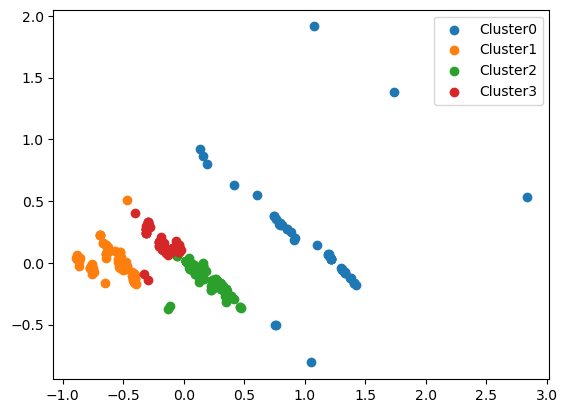

In [14]:
#agglomerative

# define the model
model = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat = model.fit_predict(PC)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
 # get row indexes for samples with this cluster
 row_ix = where(yhat == cluster)
 # create scatter of these samples
 plt.scatter(PC[row_ix, 0], PC[row_ix, 1],label=f'Cluster{cluster}')
plt.legend()
# show the plot
plt.show()

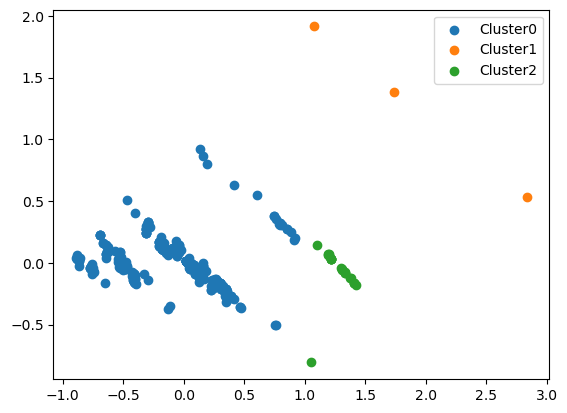

In [15]:
# spectral clustering
# define the model
model = SpectralClustering(n_clusters=3)
# fit model and predict clusters
yhat = model.fit_predict(PC)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
 # get row indexes for samples with this cluster
 row_ix = where(yhat == cluster)
 # create scatter of these samples
 plt.scatter(PC[row_ix,0], PC[row_ix,1],label=f'Cluster{cluster}')
plt.legend()
# show the plot
plt.show()

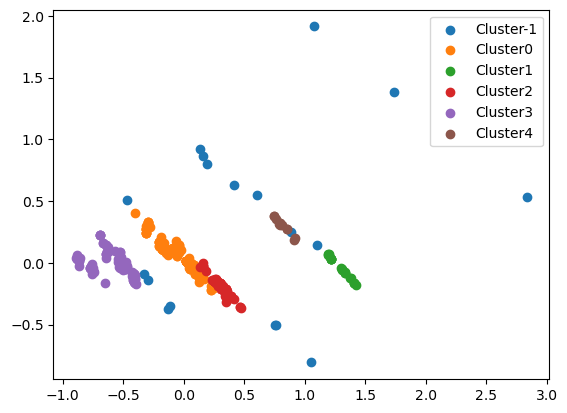

In [16]:
#DBSCAN
# define the model
model = DBSCAN(eps=0.30, min_samples=4)
# fit model and predict clusters
yhat = model.fit_predict(PC)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
 # get row indexes for samples with this cluster
 row_ix = where(yhat == cluster)
 # create scatter of these samples
 plt.scatter(PC[row_ix, 0], PC[row_ix, 1],label=f'Cluster{cluster}')
plt.legend()
# show the plot
plt.show()

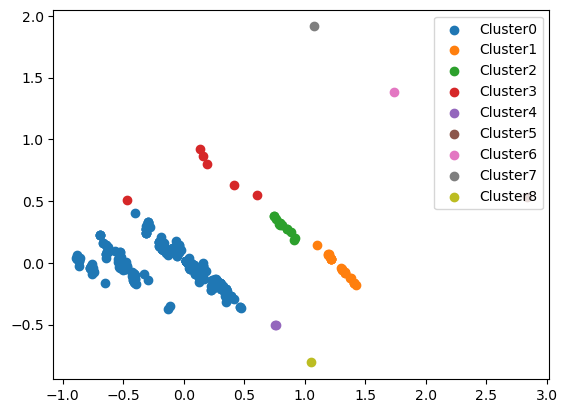

In [17]:
# mean shift clustering
model = MeanShift()
# fit model and predict clusters
yhat = model.fit_predict(PC)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
 # get row indexes for samples with this cluster
 row_ix = where(yhat == cluster)
 # create scatter of these samples
 plt.scatter(PC[row_ix, 0], PC[row_ix, 1],label=f'Cluster{cluster}')
plt.legend()
# show the plot
plt.show()

In [18]:
#Normalize Data
scaler.fit(X_train)
X_train_n = scaler.transform(X_train)
X_test_n = scaler.transform(X_test)

In [19]:
#LinReg Model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [20]:
#Train the model
lr.fit(X_train_n, y_train)

LinearRegression()

In [21]:
y_pred = lr.predict(X_test_n)
print (np.round(y_pred[1:6],2))
print (y_test[1:6])

[389.07 111.23 844.67 494.23 395.19]
[279.0 139.0 699.0 349.0 299.0]


In [22]:
#Checking R-squared values
print("R-squared for the training data: ", lr.score(X_train_n, y_train))
print("R-squared for the test data: ", lr.score(X_test_n, y_test))

R-squared for the training data:  0.6557649355205343
R-squared for the test data:  0.7036135067074583


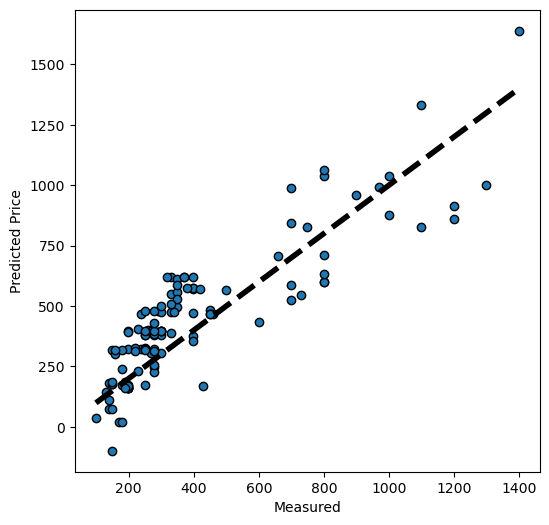

In [23]:
#Graphical Representation of True and Observed for Test Data
fig, ax = plt.subplots()
fig.set_size_inches(6,6)
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted Price')
plt.show()

In [24]:
#Point with Minimum Error
y_pred = lr.predict(X_test_n)
closest = y_test - y_pred
closest = np.absolute(closest)
best = np.amin(closest)
error = 0
for i in range(len(y_pred)):
    error += abs(y_test[i]-y_pred[i])
print(error)

15374.745176900478


In [38]:
#Coefficients and Intercept of Regression Model
c = lr.coef_
i = lr.intercept_
print(f"Weights of the features: {c}")
print(f"The intercept of the objective function: {i}")

Weights of the features: [ 135.45834386   94.92446601   29.45038098   -6.60520396 -127.36882949]
The intercept of the objective function: 414.5669014084515


In [37]:
#Using Intercept and Coefficients to make equation of Regression line
print(f"Equation of regression line: Price = {i} + {c[0]}*Storage + {c[1]}*RAM + {c[2]}*ScreenSize + {c[3]}*Camera + {c[4]}*BatteryCapacity")

Equation of regression line: Price = 414.5669014084515 + 135.4583438558017*Storage + 94.92446601305018*RAM + 29.45038097717612*ScreenSize + -6.605203960744916*Camera + -127.3688294897201*BatteryCapacity


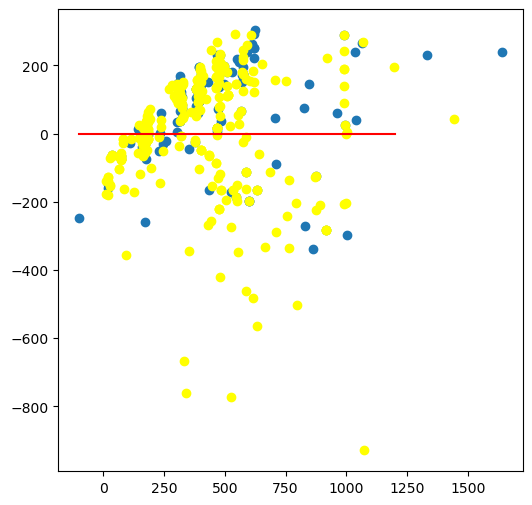

In [27]:
#Predicted vs. errors plot -> demonstrates an issue with this fit (high bias)
plt.figure(figsize=(6,6))
plt.scatter(lr.predict(X_test_n), lr.predict(X_test_n)-y_test)
plt.plot([-100,1200],[0,0], color = "red")

#place testing data on the plot as well
plt.scatter(lr.predict(X_train_n), lr.predict(X_train_n)-y_train, color = "yellow")

In [39]:
from scipy.optimize import minimize

# Define the objective function
def f(a,b,c,d,e):
    return lr.intercept_ + lr.coef_[0]*a + lr.coef_[1]*b+ lr.coef_[2]*c + lr.coef_[3]*d + lr.coef_[4]*e
def objective(x):
    a, b, c, d, e = x
    return abs(f(a, b, c, d, e) - budget)  # minimize the absolute difference between f and budget

# Set the initial guess for the values of a, b, c, d, and e
x0 = [0, 0, 0, 0, 0]  # start with all values equal to 0

# Define the constraints
# We want all values of a, b, c, d, and e to be positive
cons = ({'type': 'ineq', 'fun': lambda x: x[0]},
        {'type': 'ineq', 'fun': lambda x: x[1]},
        {'type': 'ineq', 'fun': lambda x: x[2]},
        {'type': 'ineq', 'fun': lambda x: x[3]},
        {'type': 'ineq', 'fun': lambda x: x[4]})

# Call the minimize function to find the values of a, b, c, d, and e that minimize the objective function subject to the constraints
res = minimize(objective, x0, constraints=cons)

# Print the optimal values of a, b, c, d, and e
print(f"Optimal Weights: {res.x}")

Optimal Weights: [4.09997687e-01 2.87283247e-01 8.95366362e-02 2.21818907e-06
 9.09951710e-05]


In [41]:
print(f"Objective function given optimal weights: {f(res.x[0],res.x[1],res.x[2],res.x[3],res.x[4])}")
score= (res.x[0]+res.x[1]+res.x[2]+res.x[3]+res.x[4])/5
print(f"Optimal Score: {score}")

Objective function given optimal weights: 500.0000013734571
Optimal Score: 0.15738215676704367


In [30]:
df = df.sort_values(by='Price')
print(df)

           Brand                Model  Storage       RAM  Screen Size  \
PhoneID                                                                 
251       Realme             C11 2021     0.30  0.250000     0.780645   
241        Nokia             C20 Plus     0.30  0.410714     0.780645   
217       Realme             C11 2021     0.30  0.250000     0.786452   
54        Realme            Narzo 50i     0.30  0.250000     0.780645   
274       Realme                  C11     0.30  0.250000     0.780645   
...          ...                  ...      ...       ...          ...   
58         Apple    iPhone 13 Pro Max     1.56  0.892857     0.838710   
88          Sony         Xperia 5 III     0.84  1.214286     0.664516   
368      Samsung  Galaxy S20 Ultra 5G     3.00  2.500000     0.896774   
362       Huawei             P40 Pro+     3.00  1.214286     0.803871   
374      Samsung    Galaxy Z Fold2 5G     1.56  1.857143     1.100000   

           Camera  Battery Capacity   Price     sc

In [31]:
diff = df['score'] - score
optimal = df.loc[diff.idxmin()]

In [32]:
print(optimal)

Brand                             Apple
Model               iPhone SE (2nd Gen)
Storage                            0.48
RAM                            0.410714
Screen Size                    0.258065
Camera                         0.182727
Battery Capacity                    0.1
Price                             399.0
score                          1.431506
Name: 33, dtype: object
